In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Завдання 2. Побудувати рекурентну нейронну мережу для датасету IMDb 5000 Movie Dataset

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Dropout, Embedding, Bidirectional, BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [15]:
dataset = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [16]:
dataset['sentiment'] = dataset['sentiment'].map({'positive': 1, 'negative': 0})

In [17]:
max_words = 1000
max_length = 50

tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(dataset['review'])
sequences = tokenizer.texts_to_sequences(dataset['review'])

x = pad_sequences(sequences, maxlen=max_length)
y = dataset['sentiment'].values

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7132 - loss: 0.5459 - val_accuracy: 0.8014 - val_loss: 0.4224
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8062 - loss: 0.4216 - val_accuracy: 0.8050 - val_loss: 0.4073
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8168 - loss: 0.3969 - val_accuracy: 0.8208 - val_loss: 0.4021
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8392 - loss: 0.3665 - val_accuracy: 0.8300 - val_loss: 0.3746
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8491 - loss: 0.3448 - val_accuracy: 0.8327 - val_loss: 0.3826
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8557 - loss: 0.3348 - val_accuracy: 0.8331 - val_loss: 0.3695
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8648 - loss: 0.3157 - val_accuracy: 0.8315 - val_loss: 0.3801
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8711 - loss: 0.2998 - 

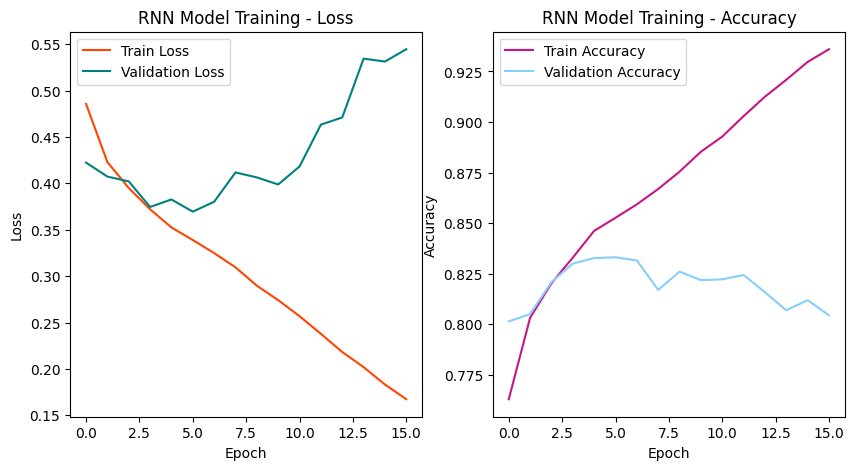

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (32, 50, 128)               │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (32, 128)                   │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (32, 128)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (32, 128)                   │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (32, 1)                     │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 780,165 (2.98 MB)

 Trainable params: 259,969 (1015.50 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 519,940 (1.98 MB)

In [25]:
# Функція для побудови графіків
def plot_history(history, title):
    plt.figure(figsize=(10, 5))

    # Побудова графіку втрат
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss', color='orangered')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='teal')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{title} - Loss')

    # Побудова графіку точності
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='mediumvioletred')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='lightskyblue')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{title} - Accuracy')

    plt.show()

# Виконання тренування
rnn_model = Sequential([
    Embedding(max_words, 128),
    LSTM(128, activation='tanh'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

rnn_model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=0.001))

rnn_history = rnn_model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

# Побудова графіків
plot_history(rnn_history, title="RNN Model Training")

# Виведення підсумків моделі
rnn_model.summary()

In [29]:
y_pred_lstm = rnn_model.predict(x_test)

# Перетворення ймовірностей на класи (0 або 1)
y_pred_classes_lstm = (y_pred_lstm > 0.5).astype("int32")

# Мапування класів на сентимент
sentiment_mapping = {0: 'negative', 1: 'positive'}
y_pred_sentiment_lstm = [sentiment_mapping[i[0]] for i in y_pred_classes_lstm]

# Створення списку для виведення результатів
output = []
for i in range(10):
    review_text = dataset.iloc[i]['review']  # Рецензія
    true_sentiment = 'positive' if dataset.iloc[i]['sentiment'] == 1 else 'negative'
    predicted_sentiment = y_pred_sentiment_lstm[i]

    output.append([review_text, true_sentiment, predicted_sentiment])

# Створення нового DataFrame з результатами
output_dataset = pd.DataFrame(output, columns=['Review', 'True Sentiment', 'Predicted Sentiment'])

# Виведення результатів
output_dataset

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Review,True Sentiment,Predicted Sentiment
0,One of the other reviewers has mentioned that ...,positive,positive
1,A wonderful little production. <br /><br />The...,positive,negative
2,I thought this was a wonderful way to spend ti...,positive,positive
3,Basically there's a family where a little boy ...,negative,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,negative
5,"Probably my all-time favorite movie, a story o...",positive,positive
6,I sure would like to see a resurrection of a u...,positive,positive
7,"This show was an amazing, fresh & innovative i...",negative,positive
8,Encouraged by the positive comments about this...,negative,negative
9,If you like original gut wrenching laughter yo...,positive,negative
